Escriba en un notebook de jupyter una explicación del método de NewtonRaphson.
Asuma que los estudiantes ya saben usar numpy y matplotlib.
Asuma que los estudiantes ya vieron cálculo diferencial pero todavía no
han visto cómo derivar numéricamente. Como explicación de los conceptos
incluya en el notebook un ejemplo para encontrar numéricamente las tres
raíces del polinomio de tercer grado f(x) = (x + 2)(x − 2)(x − 4).


# Método de Newton-Raphson

En física podemos encontrar problemas donde necesitamos hallar en qué puntos una función $f(x)$ se hace igual a cero. Como habrán visto en su curso de cálculo, saber cuándo se hace cero una función nos permite hallar puntos críticos donde el sistema descrito por la función sufre algún cambio, o por ejemplo cuando queremos optimizar un sistema (Ej: maximizar el volumen de una caja construída con una hoja de papel). 

## Ejemplo en física:

Una pelota es lanzada hacia arriba con una velocidad inicial $v=20 \rm{m/s}$. Encontrar en qué momento la pelota alcanza la altura máxima.

Para un movimiento parabólico, la posición de la pelota en función del tiempo viene descrita por la ecuación de movimiento de movimiento rectilíneo uniforme:

\begin{equation}
    x(t) = x_0 + v_0 t - \frac{1}{2} g t^2
\end{equation}

El cambio de la posición respecto al tiempo es la velocidad:

\begin{equation}
   \frac{d x(t)}{dt} = v_0 - g t
\end{equation}

Y sabemos que en el punto más alto la velocidad cambia, pasa de ser positiva a ser negativa. En ese momento la velocidad es cero.

\begin{equation}
   0 = v_0 - g t
\end{equation}

Despejando t:

\begin{equation}
   t = \frac{v_0}{g}
\end{equation}

Si $g = 9.8 \rm{m/s^2}$

In [1]:
t = 20 / 9.8

print(t)

2.0408163265306123


En 2.04 segundos la pelota habrá alcanzado la altura máxima.

Pero, ¿qué pasa cuando tenemos funciones más complejas que no podemos resolver analíticamente?

El método de Newton-Raphson nos permite resolver este tipo de problemas.

# Método de Newton-Raphson

Tenemos una función $f(x)$ de la cuál queremos encontrar sus raíces.

\begin{equation}
    f(x) =  (x + 2)(x − 2)(x − 4)
\end{equation}

Este es un polinomio de grado 3 que se encuentra factorizado, por inspección podemos ver que se anula en $x=-2$, $2$ y $4$.

Vamos a graficarlo:




In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Definamos x entre -3 y +5
x = linspace(-3,5,100)

In [4]:
# Definimos nuestra función

def f(x):
    return (x+2)*(x-2)*(x-4)

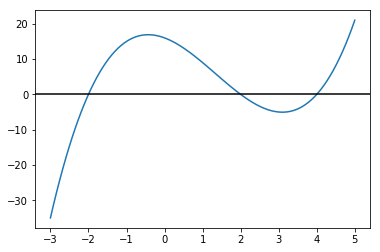

In [5]:
plot(x,f(x))
plt.axhline(0, color="black")

Para buscar un cero, definimos un valor inicial $x_0$ cercano a donde vemos que está la raíz de la función.

Vamos a buscar la raiz arrancando en $x_0= 1.0$

In [31]:
x_0 = 1

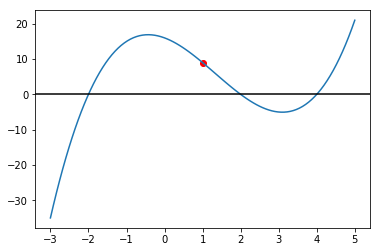

In [32]:
plot(x,f(x))
plt.axhline(0, color="black")
scatter(x_0, f(x_0), color="red")

A ojo vemos que la raíz está a la derecha.

El método de Newton-Raphson nos dice que para desplazarnos hacia la raíz desde nuestro punto actual nos movemos una distancia $s$ dada por:

$x = x_0 - \frac{f(x_0)}{f'(x_0)}$


No conocemos la derivada de la función, pero podemos calcularla recordando la definición de derivada:


\begin{equation}
    \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{(x+\epsilon) - x}
\end{equation}



In [33]:
epsilon = 0.1

Definamos cómo se calcula la derivada de $f(x)$ con este parámetro $\epsilon$

In [34]:
def derivada_f(x, epsilon):
    return ( f(x+epsilon) - f(x) ) / epsilon

Nos deberíamos desplazar hacia $x_1$ que se encuentra en:

In [35]:
x_1 = x_0 - f(x_0)/ derivada_f(x_0,epsilon)

print(x_1)

1.9900990099009892


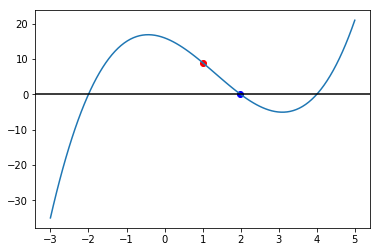

In [36]:
plot(x,f(x))
plt.axhline(0, color="black")
scatter(x_0, f(x_0), color="red")
scatter(x_1, f(x_1), color="blue")

¿Qué tan cerca quedamos?
Al evaluar f(x_1) tenemos

In [37]:
f(x_1)

0.07940300941181988

Queremos que este valor sea cero. Podemos acercarnos a este valor tanto como queramos, así que podríamos repetir el método para estar cada vez más cerca.


Si queremos mejorar nuestra precisión, repetimos:

In [39]:
x_2 = x_1 - f(x_1)/ derivada_f(x_1,epsilon)

print(x_2)

2.000236927302111


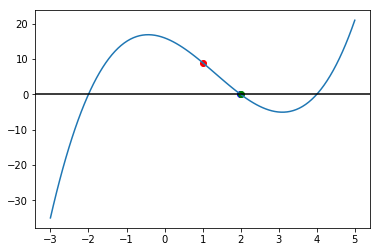

In [40]:
plot(x,f(x))
plt.axhline(0, color="black")
scatter(x_0, f(x_0), color="red")
scatter(x_1, f(x_1), color="blue")
scatter(x_2, f(x_2), color="green")

In [43]:
# El error es: 
f(x_2)  

-0.0018953061344934522

Para acercarnos tanto como queramos vamos a definir un valor de error por debajo del cuál estaremos satisfechos. Y vamos a iterar una y otra vez hasta llegar a este valor.

In [82]:
err = 1e-10
x_old = 1.5
epsilon = 0.1


x_new = x_old - f(x_old) / derivada_f(x_old,epsilon)
print(x_new,abs(f(x_new)))

#for i in range(10):
while ( abs( f(x_new) ) > err ):
    x_old = x_new
    x_new = x_old - f(x_old) / derivada_f(x_old, epsilon)
    print("x = ", x_new, " error = " , abs(f(x_new)))

1.976060935799782 0.19264495222124794
x =  2.000473508632498  error =  0.003787620532967074
x =  1.9999871657446178  error =  0.00010267437249196827
x =  2.000000345930127  error =  2.7674407783461018e-06
x =  1.9999999906745038  error =  7.460396939847012e-08
x =  2.000000000251393  error =  2.0111450281647427e-09
x =  1.999999999993223  error =  5.4216187095426894e-11


Organicemos esto en una función, y podemos calcular fácilmente los ceros de nuestra función.

In [83]:

def NewtonRaphson(x_0):
    
    err = 1e-10
    x_old = x_0
    epsilon = 0.1


    x_new = x_old - f(x_old) / derivada_f(x_old,epsilon)
    print(x_new,abs(f(x_new)))

    #for i in range(10):
    while ( abs( f(x_new) ) > err ):
        x_old = x_new
        x_new = x_old - f(x_old) / derivada_f(x_old, epsilon)
        print("x = ", x_new, " error = " , abs(f(x_new)))
        
    return x_new

In [84]:
# Veamos la raíz cercana a 1

raiz_1 = NewtonRaphson(1)

1.9900990099009892 0.07940300941181988
x =  2.000236927302111  error =  0.0018953061344934522
x =  1.9999935955846835  error =  5.1235404564958865e-05
x =  2.0000001726351893  error =  1.381081454434439e-06
x =  1.9999999953461538  error =  3.7230769621716784e-08
x =  2.0000000001254565  error =  1.0036522723706993e-09
x =  1.999999999996618  error =  2.705569102092809e-11


In [85]:
# La raíz cercana a -3

raiz_2 = NewtonRaphson(-3)

-2.234303215926493 6.185119929414296
x =  -2.0117405705168374  error =  0.2831537206966405
x =  -1.9995575681097364  error =  0.010616407993155583
x =  -2.0000191252854034  error =  0.00045901050745344497
x =  -1.999999177306626  error =  1.9744634209959847e-05
x =  -2.000000035396505  error =  8.495161286484013e-07
x =  -1.999999998477074  error =  3.655022415739403e-08
x =  -2.0000000000655236  error =  1.5725660773998295e-09
x =  -1.999999999997181  error =  6.765787929899727e-11


In [86]:
# Y la raíz cercana a 6.6

raiz_3 = NewtonRaphson(6.6)

5.23712733536504 28.982804022697586
x =  4.465623322400156  error =  7.422869996606141
x =  4.112994181696085  error =  1.4595143352600752
x =  4.013640636187328  error =  0.1651787079643471
x =  4.00096665720099  error =  0.011607362724299377
x =  4.000061653260199  error =  0.0007398695316225803
x =  4.000003900606605  error =  4.680740097579107e-05
x =  4.000000246651206  error =  2.9598149602077883e-06
x =  4.000000015596247  error =  1.8715496547277993e-07
x =  4.00000000098618  error =  1.1834160326138453e-08
x =  4.000000000062358  error =  7.482974240558214e-10
x =  4.000000000003943  error =  4.7311488060710626e-11


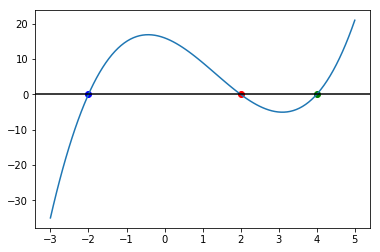

In [87]:
plot(x,f(x))
plt.axhline(0, color="black")
scatter(raiz_1, f(raiz_1), color="red")
scatter(raiz_2, f(raiz_2), color="blue")
scatter(raiz_3, f(raiz_3), color="green")